In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5] #Plotgröße anpassen
import matplotlib
matplotlib.rcParams['text.usetex'] = True
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)
from sympy import *
from sympy.physics.units import ohm, ampere, henry, farad,second, convert_to
init_printing(use_latex='mathjax')
#from scipy import signal
from IPython.display import display, Markdown, Latex, Math

R,L,C,w=symbols('R,L,C,\omega',real=true)
Ic,U,U_1,U_2,I_1,I_2,Z_L=symbols('Ic,U,U_1,U_2,I_1,I_2,Z_L')
phi=symbols("\phi",real=true)

# Bodediagramme von Filter

##  Tiefpasses erster Ordnung

```{figure} ./images/TP_1ord.jpg
:name: tp_1ord
:width: 300px

Tiefpass erster Ordnung
```

Die Vierpoltheorie erlaubt es den Tiefpass mittels Matrizenschreibweise zu beschreiben.

In [2]:
A = Matrix([[I*w*C*R+1,R],[I*w*C,1]])
display(Math('$A = ' + latex(A) + '$'))

<IPython.core.display.Math object>

In [3]:
X=Matrix([[S('U_2')],[S('I_2')]])
Y=Matrix([[S('U_1')],[S('I_1')]])
display(Math('$ ' + latex(Y) + ' = ' + latex(A) + '\cdot' + latex(X) +  ' $'))

<IPython.core.display.Math object>

Die Übetragungsfunktion der Spannung ergibt sich mit folgender Beziehung.
$ U_1 = U_2 \cdot (a_11 + a_12/Z_L)\cdot  $

In [4]:
eq1=Eq(U_2/U_1,simplify(1/(A[0,0]+A[0,1]/Z_L)))
eq1

U₂              Z_L            
── = ──────────────────────────
U₁   R + Z_L⋅(ⅈ⋅C⋅R⋅\omega + 1)

Wird der Tiefpass im Leerlauf betrachtet so kann von einem unendlich großen $Z_L$ ausgegangen werden. damit vereinfacht sich die Übertragungsfunktion. 

In [5]:
eq1=Eq(U_2/U_1,simplify(1/(A[0,0])))
eq1

U₂          1        
── = ────────────────
U₁   ⅈ⋅C⋅R⋅\omega + 1

Alternativ kann die Übertragungsgleichung auch mittels Spannungsteiler hergeleitet werden.

In [6]:
Z_p = (1/(I*w*C))
Z = Z_p + R
#display(Z_p)
#display(Z)
eq2=Eq(U_2/U_1,simplify(Z_p/Z))
eq2

U₂        -ⅈ       
── = ──────────────
U₁   C⋅R⋅\omega - ⅈ

## Frequenzverlauf - Bodediagramm

Betrag der Übertragungsfunktion

In [7]:
eq3=Eq(S('Gb'),abs(eq2.rhs))
eq3

               1           
Gb = ──────────────────────
        ___________________
       ╱  2  2       2     
     ╲╱  C ⋅R ⋅\omega  + 1 

Phase der Übertragungsfunktion

In [8]:
eq4=Eq(S('Gp'),arg(eq2.rhs))
eq4

        ⎛     -ⅈ       ⎞
Gp = arg⎜──────────────⎟
        ⎝C⋅R⋅\omega - ⅈ⎠

In [9]:
display(Markdown('Die Grezfrequenz ergibt sich aus folgender Formel.'))
eq1 = (Eq(S('omega_g'),1/(R*C)))
eq1

Die Grezfrequenz ergibt sich aus folgender Formel.

       1 
ω_g = ───
      C⋅R

In [10]:
LN=0.1 #H
RN=1000#Ohm
CN=10**-6 #C
ZLN=1000 #Ohm

omega_start_exponent = 0 #Exponent zur Basis 10 --> omega_start = 10^omega_start_exponent
omega_end_exponent = 7 #Exponent zur Basis 10 --> --> omega_end = 10^omega_end_exponent
eq2 = Eq(eq1.lhs,convert_to(eq1.subs({C:CN,R:RN}).rhs,second))
eq2
display(Latex('$ ' + latex(eq2) + ' \ \\frac{1}{\\text{s}} $'))

<IPython.core.display.Latex object>

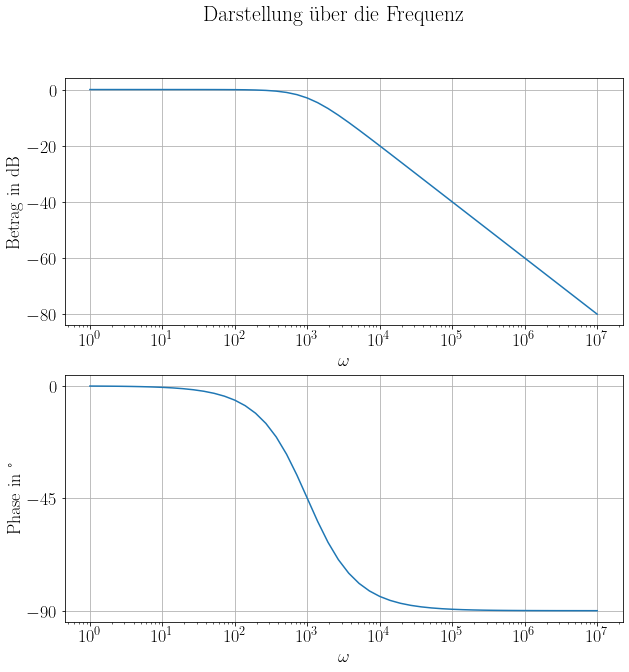

In [11]:
magnitude=eq3.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})
phase=eq4.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})

w_array = np.logspace(omega_start_exponent,omega_end_exponent,50) #generate omega array

magnitudeN=lambdify(w,magnitude ,"numpy") #convert sympy to numpy

phaseN=lambdify(w, 180*phase/np.pi,"numpy") #convert sympy to numpy

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
fig.suptitle('Darstellung über die Frequenz')

ax1.plot(w_array,20*np.log10(magnitudeN(w_array)))
ax1.set_ylabel('Betrag in dB')
ax1.set(xlabel='$\omega$',xscale='log',yscale='linear')
ax1.grid()

ax2.plot(w_array,phaseN(w_array))
ax2.set(xlabel='$\omega$',xscale='log',ylabel = 'Phase in °',yticks=[-90,-45,0])
ax2.grid()


Es ist zu erkennen, dass bei einem Tiefpass erster Ordnung der Betrag der Übertragungsfunktion mit $-20 \ \text{dB}$ pro Dekade abfällt. Weiter dreht die Phase von $0 \ °$ auf $-90 \ °$. Bei der Grenzfrequenz $\omega_g$ ist der Betrg der Übertragungsfunktion um $-3 \ dB$ abgedfallen. Gleichzeitig ist die Phase um $-45 \ °$ gedreht.

## Tiefpasses zweiter Ordnung

```{figure} ./images/TP_2ord.jpg
:name: tp_2ord
:width: 300px

Tiefpass zweiter Ordnung
```

In [12]:
Z_p = 1/(I*w*C)
Z = Z_p + R + I*w*L
#display(Z_p)
#display(Z)
eq2=Eq(U_2/U_1,simplify(Z_p/Z))
display(Markdown('Die Übertragungsfunktion'))
display(eq2)
eq3=Eq(S('Gb'),abs(eq2.rhs))
display(Markdown('Der Betrag'))
display((eq3))
eq4=Eq(S('Gp'),arg(eq2.rhs))
display(Markdown('Die Phase'))
display(eq4)

Die Übertragungsfunktion

U₂                -ⅈ              
── = ─────────────────────────────
U₁   C⋅\omega⋅(ⅈ⋅L⋅\omega + R) - ⅈ

Der Betrag

                               1                           
Gb = ──────────────────────────────────────────────────────
        ___________________________________________________
       ╱  2  2       4    2  2       2               2     
     ╲╱  C ⋅L ⋅\omega  + C ⋅R ⋅\omega  - 2⋅C⋅L⋅\omega  + 1 

Die Phase

        ⎛             -ⅈ              ⎞
Gp = arg⎜─────────────────────────────⎟
        ⎝C⋅\omega⋅(ⅈ⋅L⋅\omega + R) - ⅈ⎠

Die Resonanzfrequenz ergibt sich aus folgender Formel.

        1   
ωᵣ = ───────
       _____
     ╲╱ C⋅L 

<IPython.core.display.Latex object>

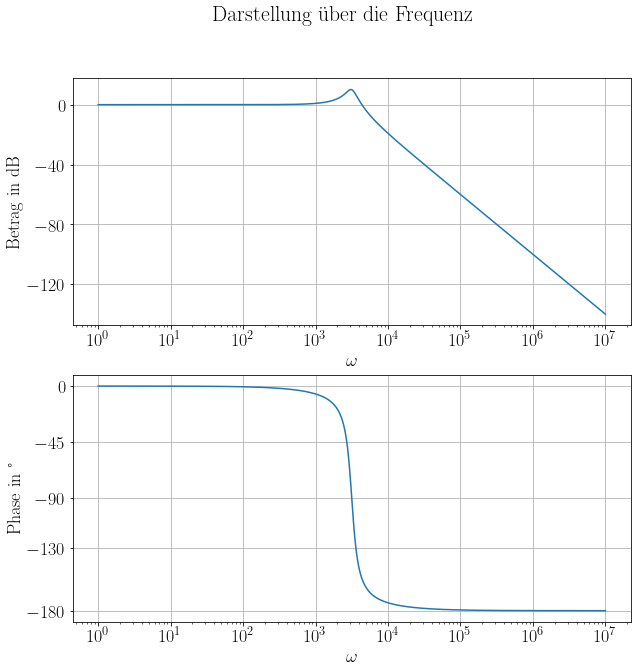

In [13]:
LN=0.1 #H
RN=100#Ohm
CN=10**-6 #C
ZLN=1000 #Ohm

omega_start_exponent = 0 #Exponent zur Basis 10 --> omega_start = 10^omega_start_exponent
omega_end_exponent = 7 #Exponent zur Basis 10 --> --> omega_end = 10^omega_end_exponent

eq1 = (Eq(S('omega_r'),1/sqrt(C*L)))
display(Markdown('Die Resonanzfrequenz ergibt sich aus folgender Formel.'))
display(eq1)
eq2 = Eq(eq1.lhs,convert_to(eq1.subs({C:CN,L:LN}).rhs,second))
display(Latex('$ ' + latex(eq2) + ' \ \\frac{1}{\\text{s}} $'))

magnitude=eq3.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})
phase=eq4.rhs.subs({Z_L:ZLN,R:RN,C:CN,L:LN})

w_array = np.logspace(omega_start_exponent,omega_end_exponent,10**3) #generate omega array

magnitudeN=lambdify(w,magnitude ,"numpy") #convert sympy to numpy

phaseN=lambdify(w, 180*phase/np.pi,"numpy") #convert sympy to numpy

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
fig.suptitle('Darstellung über die Frequenz')

ax1.plot(w_array,20*np.log10(magnitudeN(w_array)))
ax1.set_ylabel('Betrag in dB')
ax1.set(xlabel='$\omega$',xscale='log',yscale='linear',yticks=np.arange(20*np.log10(magnitudeN(w_array))[0],min(20*np.log10(magnitudeN(w_array))),-40))
ax1.grid()

ax2.plot(w_array,phaseN(w_array))
ax2.set(xlabel='$\omega$',xscale='log',ylabel = 'Phase in °',yticks=[-180,-130,-90,-45,0])
ax2.grid()

Es ist zu erkennen, dass bei einem Tiefpass zweiter Ordnung der Betrag der Übertragungsfunktion mit $-40 \ \text{dB}$ pro Dekade abfällt. Weiter dreht die Phase von $0 \ °$ auf $-180 \ °$. Durch diese Drehung um $180 °$ ist das System potentiell schwingfähig. Bei der Resonanzfrequenz ist die Phase um $-90 \ °$  gedreht.